In [139]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns

## Data Preparation

In [141]:
yellow_ride_df = pd.read_parquet("data/")
fields = ["tpep_pickup_datetime", "tpep_dropoff_datetime", "PULocationID", "DOLocationID"]
yellow_ride_df = yellow_ride_df[fields]

yellow_ride_df["tpep_pickup_datetime"] = pd.to_datetime(yellow_ride_df.tpep_pickup_datetime)
yellow_ride_df["tpep_dropoff_datetime"] = pd.to_datetime(yellow_ride_df.tpep_dropoff_datetime)

yellow_ride_df["duration_minutes"] = yellow_ride_df.tpep_dropoff_datetime - yellow_ride_df.tpep_pickup_datetime
yellow_ride_df["duration_minutes"] = yellow_ride_df.duration_minutes.dt.total_seconds() / 60

duration_outliers_filter = (yellow_ride_df.duration_minutes >= 1) & (yellow_ride_df.duration_minutes <= 60)
records_left = len(yellow_ride_df.loc[duration_outliers_filter]) / len(yellow_ride_df) * 100

print(f"Standard deviation of duration (minutes): {yellow_ride_df.duration_minutes.std():.2f}")
yellow_ride_df = yellow_ride_df.loc[duration_outliers_filter]

print(f"Standard deviation of duration (minutes) without outliers: {yellow_ride_df.duration_minutes.std():.2f}")
print(f"Records left after removing the outliers: {records_left:.2f}")

Standard deviation of duration (minutes): 46.90
Standard deviation of duration (minutes) without outliers: 9.37
Records left after removing the outliers: 98.09


## Split dataset into train & validation

In [164]:
train_df = yellow_ride_df[yellow_ride_df.tpep_pickup_datetime.dt.month == 1].copy()
validation_df = yellow_ride_df[yellow_ride_df.tpep_pickup_datetime.dt.month == 2].copy()

In [165]:
print(f"Length of the training dataset: {len(train_df)}")
print(f"Length of the training dataset: {len(validation_df)}")

Length of the training dataset: 2421424
Length of the training dataset: 2918139


## One-hot encoding

In [166]:
categorical_fields = ["PULocationID", "DOLocationID"]

In [167]:
train_df[categorical_fields] = train_df[categorical_fields].astype(str)
validation_df[categorical_fields] = validation_df[categorical_fields].astype(str)

In [168]:
train_dict = train_df[categorical_fields].to_dict(orient="records")
validation_dict = validation_df[categorical_fields].to_dict(orient="records")

In [169]:
dv = DictVectorizer()
x_train = dv.fit_transform(train_dict)
x_validation = dv.fit_transform(validation_dict)

## Training Model

In [170]:
target = "duration_minutes"
y_train = train_df[target].values
y_validation = validation_df[target].values

In [171]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [172]:
y_prediction = lr.predict(x_validation)

ValueError: X has 514 features, but LinearRegression is expecting 515 features as input.

<Axes: ylabel='Count'>

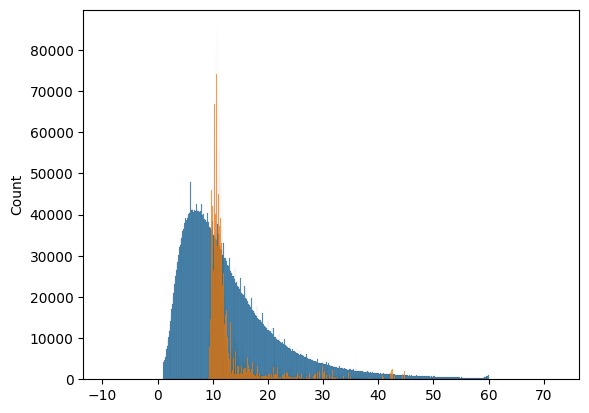

In [140]:
sns.histplot(y_train, label="train")
sns.histplot(y_prediction, label="prediction")